In [3]:
# Univariate Time Series Analysis
# load and plot dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.covariance import EmpiricalCovariance
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.datasets import make_circles
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.cluster import KMeans
import numpy as np
np.random.seed(123)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import TimeSeriesSplit
import seaborn as sns
sns.set_style('dark')
from datetime import datetime, timedelta
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = (15, 6)

import matplotlib.pyplot as plt
import pandas as pd
import math

import tensorflow as tf
tf.random.set_seed(1234)

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN, GRU, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from IPython.display import set_matplotlib_formats
import warnings


warnings.filterwarnings('ignore')

from pandas import read_csv
from matplotlib import pyplot

In [5]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

# Veri setini yükleme
series = pd.read_csv('shampoo.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)

            Sales
Month            
1901-01-01  266.0
1901-02-01  145.9
1901-03-01  183.1
1901-04-01  119.3
1901-05-01  180.3


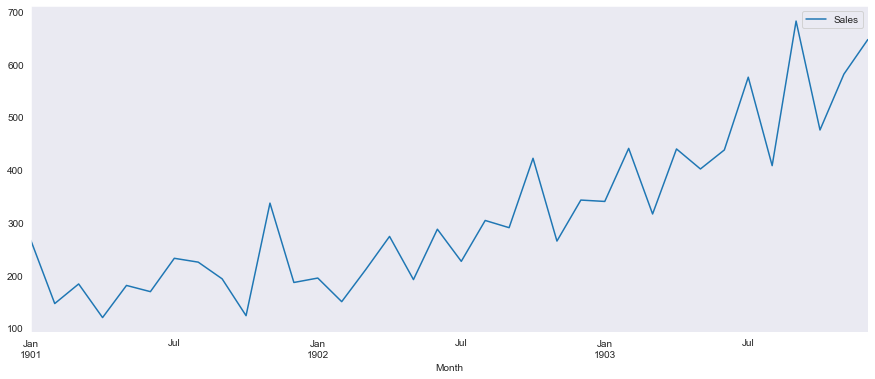

In [6]:
# summarize first few rows
print(series.head())
series.plot()
pyplot.show()

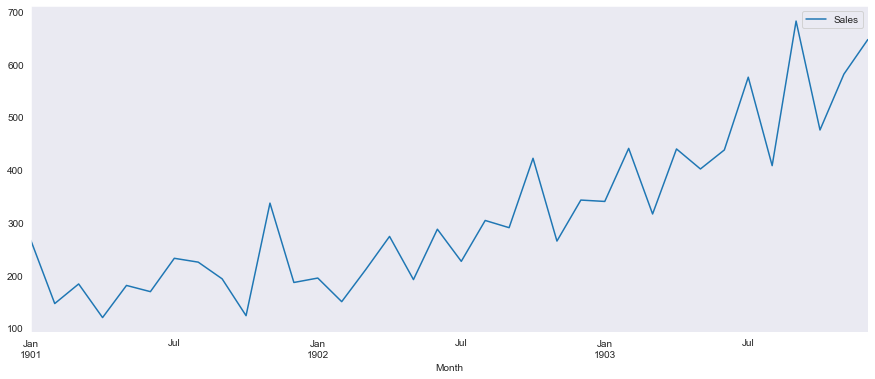

In [7]:

# Çizgi grafiği
series.plot()
plt.show()

In [8]:
# Veri setini eğitim ve test setlerine böleme
train_size = int(len(series) * 0.75)
train, test = series[:train_size], series[train_size:]

In [9]:
# Eğitim ve test verilerini normalleştirme
scaler = MinMaxScaler(feature_range=(-1, 1))
train = scaler.fit_transform(train.values.reshape(-1, 1))
test = scaler.transform(test.values.reshape(-1, 1))

In [10]:
# Trö yapma ve performansı raporlama
lag = np.concatenate((train[[-1]], test[:-1]), axis=0)
rmse = np.sqrt(mean_squared_error(test, lag))
print('RMSE: %.3f' % rmse)

RMSE: 0.926


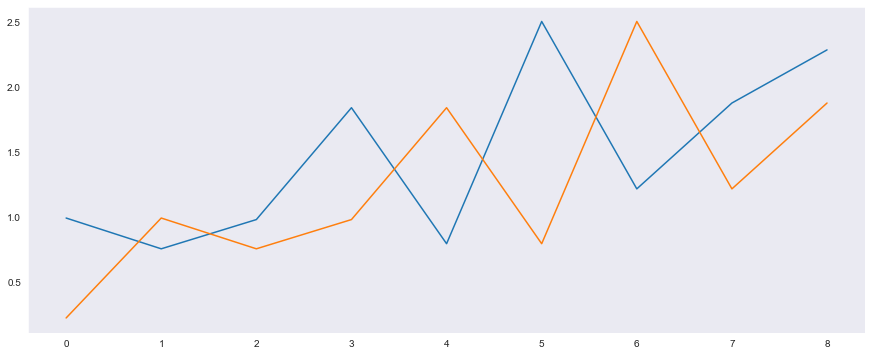

In [11]:
# Gözlemlenen ve tahmin edilen değerlerin çizgi grafiği
plt.plot(test)
plt.plot(lag)
plt.show()

In [12]:
# Zaman serisini gecikmelere dönüştürme
def timeseries_to_supervised(data, lag=1):
    columns = [data.shift(i) for i in range(lag, 0, -1)]
    columns.append(data)
    df = pd.concat(columns, axis=1)
    colnames = ['lag_' + str(i) for i in range(lag, 0, -1)]
    colnames.append('original')
    df.columns = colnames
    df.fillna(0, inplace=True)
    return df

In [13]:
# Veriyi gecikmelere dönüştürme
df = timeseries_to_supervised(pd.DataFrame(series), lag=1)
print(df.head())


            lag_1  original
Month                      
1901-01-01    0.0     266.0
1901-02-01  266.0     145.9
1901-03-01  145.9     183.1
1901-04-01  183.1     119.3
1901-05-01  119.3     180.3


In [14]:
# Fark alma
def difference(dataset, interval=1):
    return dataset.diff(interval).iloc[1:, :]

diff_series = difference(pd.DataFrame(series), interval=1)
print(diff_series.head())


            Sales
Month            
1901-02-01 -120.1
1901-03-01   37.2
1901-04-01  -63.8
1901-05-01   61.0
1901-06-01  -11.8


In [15]:
# Veriyi gecikmelere dönüştürme ve fark alma
lag_diff_df = timeseries_to_supervised(diff_series, lag=1)
print(lag_diff_df.head())

            lag_1  original
Month                      
1901-02-01    0.0    -120.1
1901-03-01 -120.1      37.2
1901-04-01   37.2     -63.8
1901-05-01  -63.8      61.0
1901-06-01   61.0     -11.8


In [17]:
# Scale dữ liệu
scaler = MinMaxScaler(feature_range = (-1, 1))
scaler = scaler.fit(train)
train_scaled = scaler.transform(train)
test_scaled = scaler.transform(test)
train_scaled[:5]

array([[-0.08626596],
       [-0.83431953],
       [-0.60261601],
       [-1.        ],
       [-0.62005606]])

In [18]:
# Lấy các giá trị của predictor X và output y. Reshape lại X để phù hợp với batch_size_input
X_train, y_train = train_scaled[:, 1:], train_scaled[:, 0]
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_train.shape

(27, 1, 0)

In [19]:
from keras.layers import LSTM, Dense
from keras.models import Sequential

# 1. Khởi tạo network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape = (batch_size, X_train.shape[1], X_train.shape[2]), stateful = True))
model.add(Dense(1, activation = 'linear'))

# 2. Xây dựng thuật toán gradient cập nhật dữ liệu 
model.compile(loss = 'mean_squared_error', optimizer ='adam')

In [20]:
# 3. Fitting model
# for i in range(100):
n_epochs = 1000
for i in range(n_epochs):
    model.fit(X_train, y_train, epochs = 1, batch_size = batch_size, verbose = 0, shuffle = False)
    model.reset_states()

In [21]:
model.predict(X_train, batch_size = 1) 

27/27 [==============================] - 0s 732us/step


array([[-0.39189774],
       [-0.542892  ],
       [-0.65222526],
       [-0.6881447 ],
       [-0.67466974],
       [-0.638635  ],
       [-0.5948772 ],
       [-0.55177474],
       [-0.51388776],
       [-0.482885  ],
       [-0.45829192],
       [-0.43831336],
       [-0.42042932],
       [-0.40162918],
       [-0.3783353 ],
       [-0.34602886],
       [-0.29847234],
       [-0.2265562 ],
       [-0.11827272],
       [ 0.03343529],
       [ 0.20749292],
       [ 0.3536823 ],
       [ 0.4472923 ],
       [ 0.49784735],
       [ 0.51665807],
       [ 0.50364685],
       [ 0.44403276]], dtype=float32)

In [22]:
print(train_scaled.shape)
print(test_scaled.shape)

(27, 1)
(9, 1)


In [24]:
#print(X_train.shape)
#print(X_test.shape)

# BİDAHA BAKALIM
#Aşağıda, model oluşturma sürecini daha düzgün hale getirmek için veri işleme fonksiyonları, LSTM ağ oluşturma fonksiyonları, #sonuç değerlendirme ve tahmin fonksiyonları dahil olmak üzere fonksiyonları yeniden yazacağız.

In [72]:
# Load your dataset
#series = pd.read_csv('shampoo.csv', sep='\t', index_col=0)
series = pd.read_csv('shampoo.csv')

In [73]:
series

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


In [74]:
# Function to create a supervised learning dataset
def create_dataset(data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(data) - look_back):
        dataX.append(data[i:(i + look_back), 0])
        dataY.append(data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [75]:
print(series.columns)


Index(['Month', 'Sales'], dtype='object')


In [76]:
# Data preprocessing
data = series['Sales'].values  # Replace 'Shampoo_Sales' with the actual column name
data = data.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)


In [77]:
# Split into train and test sets
train_size = int(len(data) * 0.67)
train, test = data[0:train_size], data[train_size:]


In [78]:
# Create supervised datasets
look_back = 1
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))


In [79]:
# Build and train the LSTM model
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)


Epoch 1/100
23/23 - 1s - loss: 0.0469 - 1s/epoch - 46ms/step
Epoch 2/100
23/23 - 0s - loss: 0.0383 - 22ms/epoch - 957us/step
Epoch 3/100
23/23 - 0s - loss: 0.0320 - 21ms/epoch - 934us/step
Epoch 4/100
23/23 - 0s - loss: 0.0272 - 20ms/epoch - 873us/step
Epoch 5/100
23/23 - 0s - loss: 0.0235 - 26ms/epoch - 1ms/step
Epoch 6/100
23/23 - 0s - loss: 0.0213 - 23ms/epoch - 997us/step
Epoch 7/100
23/23 - 0s - loss: 0.0195 - 24ms/epoch - 1ms/step
Epoch 8/100
23/23 - 0s - loss: 0.0185 - 21ms/epoch - 895us/step
Epoch 9/100
23/23 - 0s - loss: 0.0180 - 31ms/epoch - 1ms/step
Epoch 10/100
23/23 - 0s - loss: 0.0176 - 23ms/epoch - 998us/step
Epoch 11/100
23/23 - 0s - loss: 0.0171 - 23ms/epoch - 991us/step
Epoch 12/100
23/23 - 0s - loss: 0.0172 - 22ms/epoch - 972us/step
Epoch 13/100
23/23 - 0s - loss: 0.0170 - 23ms/epoch - 1ms/step
Epoch 14/100
23/23 - 0s - loss: 0.0171 - 25ms/epoch - 1ms/step
Epoch 15/100
23/23 - 0s - loss: 0.0169 - 22ms/epoch - 937us/step
Epoch 16/100
23/23 - 0s - loss: 0.0170 - 27ms/e

In [80]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

1/1 [==============================] - 0s 17ms/step


In [81]:
# Invert the scaling
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

In [89]:
# Plot the results
train_predict_plot = np.empty_like(data)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back:len(train_predict) + look_back, :] = train_predict


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 20ms/step


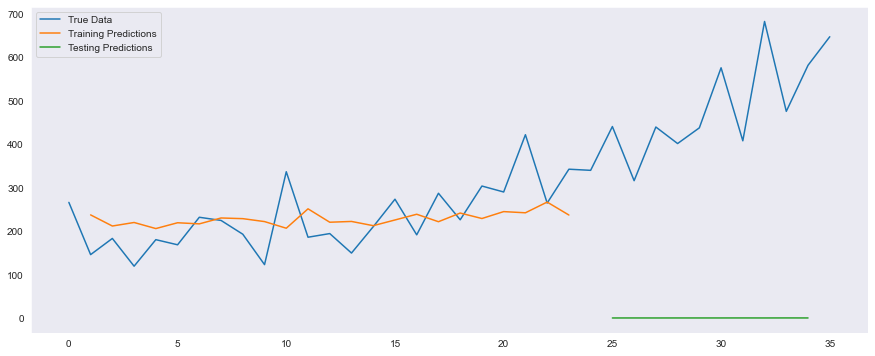

In [96]:
test_predict = model.predict(X_test)

test_predict = test_predict.reshape(-1, 1)

# Daha sonraki kodlar
test_predict_plot = np.empty_like(data)
test_predict_plot[:, :] = np.nan
test_start = len(train_predict) + (look_back * 2)
test_end = test_start + len(test_predict)

# test_predict_plot dizisini test_predict'in boyutuna uygun hale getirin
test_predict_plot[test_start:test_end, :] = test_predict

# test_predict_plot dizisini bir satır azaltın
test_predict_plot = test_predict_plot[:-1, :]

plt.plot(scaler.inverse_transform(data), label='True Data')
plt.plot(train_predict_plot, label='Training Predictions')
plt.plot(test_predict_plot, label='Testing Predictions')
plt.legend()
plt.show()